***SVM*** - Support Vector Machine is a discriminative classifier that is formally designed by seperative hyperplane. It is a representation of examples as points in space that are mapped so that points of different categories are seperated by a gap as wide as possible.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn import datasets

# In general

### Collecting data

In [2]:
golf = pd.read_csv("../DataSets/golf-dataset.csv")
golf.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [3]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Outlook    14 non-null     object
 1   Temp       14 non-null     object
 2   Humidity   14 non-null     object
 3   Windy      14 non-null     bool  
 4   Play Golf  14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [4]:
golf.isnull().sum()

Outlook      0
Temp         0
Humidity     0
Windy        0
Play Golf    0
dtype: int64

### Converting everything into category datatype

In [5]:
golf = golf.apply(lambda x : x.astype('category'))
golf.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [6]:
df = golf.apply(lambda x : x.cat.codes)
df.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


In [7]:
X = df.drop('Play Golf', axis=1)
y = df['Play Golf']

### Train Test Split data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### SVM Algorithm

In [9]:
from sklearn.svm import SVC
from sklearn import svm  # svm = support vector machine
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

### Predictions

In [10]:
predict_clf = clf.predict(X_test)
predict_clf[:20]

array([1, 1, 1, 1, 1], dtype=int8)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, predict_clf))
print('\n')
print(accuracy_score(y_test, predict_clf))

[[0 1]
 [0 4]]


0.8


# Linear Classifier

In [12]:
iris = datasets.load_iris()
# iris

In [13]:
X = iris['data'][:, (2, 3)] # peatl_length, petal_width
y = iris['target']

# Converting classified data into categorial form
setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

print(X[0:10])
print(y[0:10])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


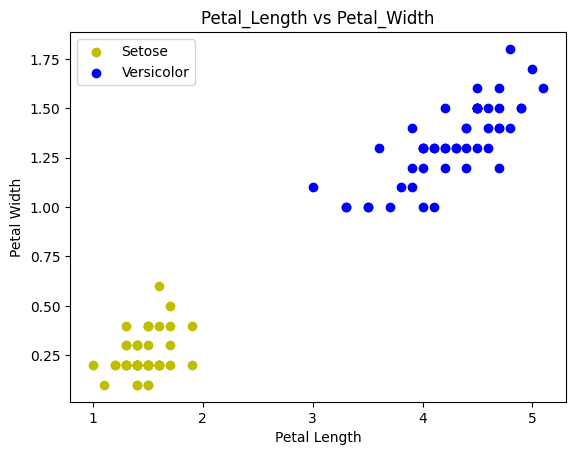

In [14]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], label='Setose', color='y')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], label='Versicolor', color='b')

plt.title("Petal_Length vs Petal_Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

In [15]:
# Initilizing SVM Model
svm_clf = SVC(kernel = 'linear', C = float(1e6))  # max C = hard classifier
# The C parameter is the regularization parameter, which controls the trade-off between having a smooth decision
# boundary and classifying the training points correctly. A higher C value indicates a more strict classification,
# potentially leading to overfitting if not tuned properly.

svm_clf.fit(X, y)

SVC(C=1000000.0, kernel='linear')

In [16]:
svm_clf.coef_ # Weight terms
# coef_ attribute stores the weights assigned to the features in the decision function.
# These weights define the hyperplane

array([[1.29411744, 0.82352928]])

In [17]:
svm_clf.intercept_ # bias terms
# The intercept_ attribute in scikit-learn's SVM classifier provides the value of the bias term learned 
# during the training process. It's essential for correctly placing the decision boundary in the feature space.

array([-3.78823471])

In [18]:
def plot_svc_decision_boundry(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # decision_function = coef[0]×feature1 + coef[1]×feature2 + intercept
    # At the deciciom boundry, (w0 * X0) + (w1 * X1) + b = 0
    # x1 = -w0/w1 * X0 - b/w1
    
    X0 = np.linspace(xmin, xmax, 200)
    decision_boundry = -w[0]/w[1] * X0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundry + margin
    gutter_down = decision_boundry - margin
    
    svs = svm_clf.support_vectors_  # tells where the support vectors are
    plt.scatter( svs[:, 0], svs[:, 1], s = 180, facecolor = '#FAAAAA', label = 'Support Vectors') # Highlight Support Vectors
    plt.plot(X0, decision_boundry, 'k-', lw = 2, label = "hyperplane")
    plt.plot(X0, gutter_up, 'k--', lw = 2)
    plt.plot(X0, gutter_down, 'k--', lw = 2)

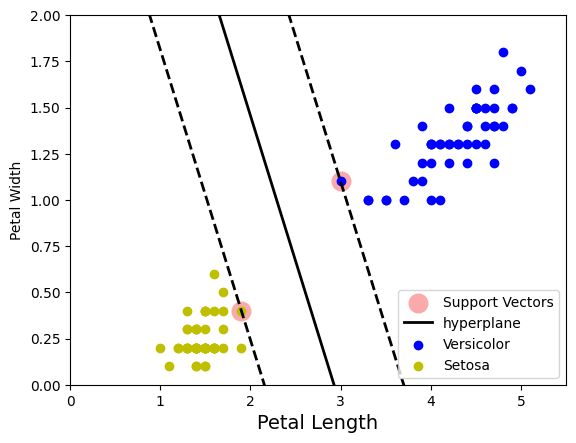

In [19]:
plot_svc_decision_boundry(svm_clf, 0, 5.5)

plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='b', label='Versicolor')
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='y', label='Setosa')

plt.axis([0, 5.5, 0, 2])

plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width")

plt.legend()
plt.show()

In [20]:
svm_clf.support_vectors_  # tells where the support vectors are

array([[1.9, 0.4],
       [3. , 1.1]])

## Why scaling is important

### Unscaled

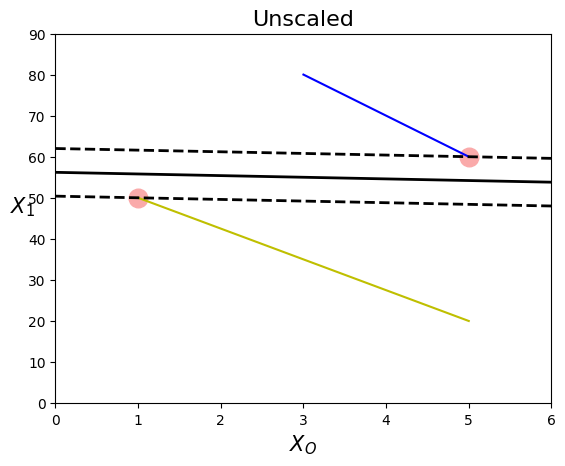

In [21]:
# Unscaled
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

svm_clf = SVC(kernel='linear', C=100)
# In this case, C=100 indicates a high penalty for misclassification, effectively making the classifier
# a hard margin classifier, which tries to correctly classify all training points, potentially leading 
# to a narrower margin but potentially better performance on the training data.

svm_clf.fit(Xs, ys)

plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], c='b')
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], c='y')

plot_svc_decision_boundry(svm_clf, 0, 6)

plt.xlabel("$X_O$", fontsize=15)
plt.ylabel("$X_1$", fontsize=15, rotation=0)

plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

plt.show()

### Scaled

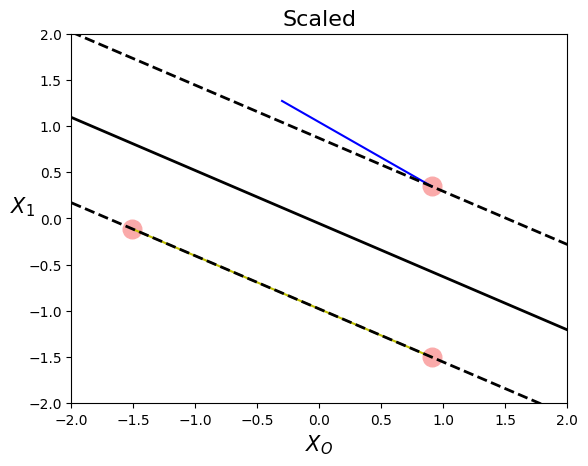

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], c='b')
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], c='y')

plot_svc_decision_boundry(svm_clf, -2, 2)

plt.xlabel("$X_O$", fontsize=15)
plt.ylabel("$X_1$", fontsize=15, rotation=0)

plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

plt.show()

# Non-Linear Classifier

In [23]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=5, noise = 0.15, random_state=30)
print(X)
print(y)

[[ 1.11552223 -0.26171423]
 [-0.96905753  0.06724917]
 [-0.00751992  0.44006843]
 [ 0.91749823 -0.10622597]
 [ 1.76590147  0.52501228]]
[1 0 1 0 1]


The make_moons function from scikit-learn generates a synthetic dataset for binary classification where the classes are shaped as two interleaving half circles (resembling the shape of a crescent moon). 

**n_samples** =100: This parameter specifies the number of data points to generate. 

**noise** =0.15: This parameter controls the amount of noise to add to the data.A higher noise value means more noisy data, which can make the classification task more challenging. 

**random_state** =30: This parameter sets the random seed for reproducibility. By setting random_state to a specific value (e.g., 30), you ensure that the generated dataset will be the same every time you run the code, which is useful for debugging and ensuring consistent results in experiments.

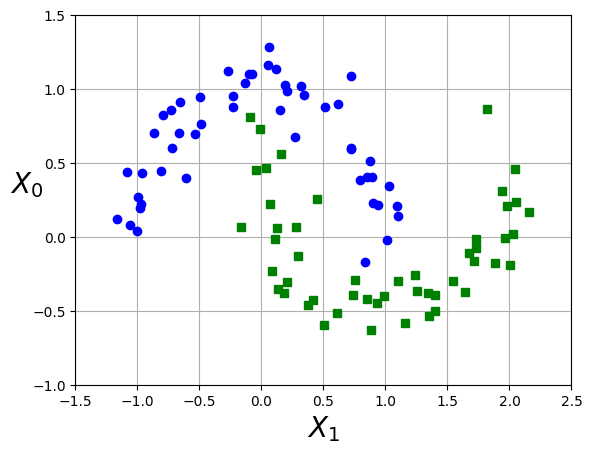

In [24]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise = 0.15, random_state=30)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bo')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'gs')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$X_1$", fontsize=20)
    plt.ylabel(r"$X_0$", fontsize=20, rotation = 0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### Introducing PipeLine

In [25]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

In [26]:
from sklearn.pipeline import Pipeline

svm_pipe = Pipeline([("scalar", StandardScaler()),
                    ("svm_clf_pipe", SVC(kernel="linear", C=100))])

svm_pipe.fit(Xs, ys)

Pipeline(steps=[('scalar', StandardScaler()),
                ('svm_clf_pipe', SVC(C=100, kernel='linear'))])

In [27]:
# Accessing Individual Model
svm_pipe["svm_clf_pipe"]

SVC(C=100, kernel='linear')

## Polynomial Features

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
X = np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [30]:
pf = PolynomialFeatures(degree=3)
# PolynomialFeatures(degree=3): This creates a PolynomialFeatures transformer object with a specified degree of 3. 
# This means that it will generate new features by raising the input features to the power of 0 to 3
# and also include interaction terms (products of features).

pf.fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [31]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise = 0.15, random_state=30)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bo')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'gs')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$X_1$", fontsize=20)
    plt.ylabel(r"$X_0$", fontsize=20, rotation = 0)

plt.show()

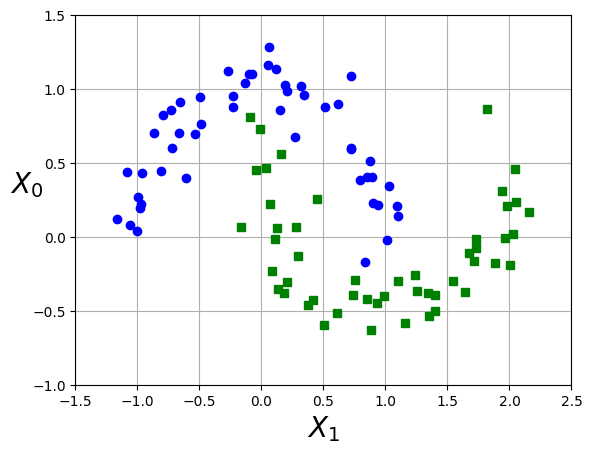

In [32]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
   ("svm_clf", LinearSVC(C=10, loss='squared_hinge', random_state=42, max_iter=10000, dual=False))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scalar', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, dual=False, max_iter=10000, random_state=42))])

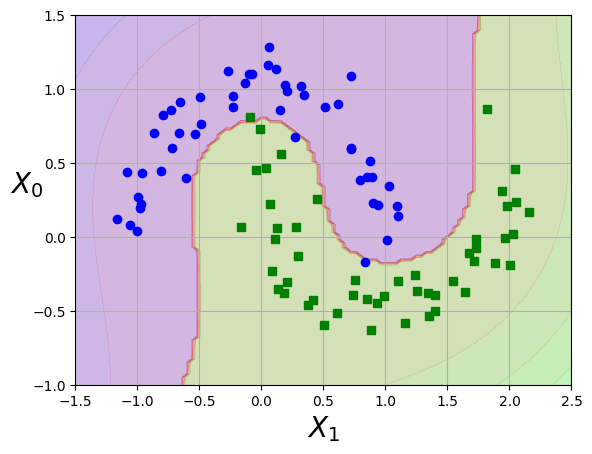

In [34]:
def plot_predictions(clf, axes):
    X0s = np.linspace(axes[0], axes[1], 100)
    X1s = np.linspace(axes[2], axes[3], 100)
    
# axes[0] is the minimum value for the x-axis.
# axes[1] is the maximum value for the x-axis.
# axes[2] is the minimum value for the y-axis.
# axes[3] is the maximum value for the y-axis.

    X0, X1 = np.meshgrid(X0s, X1s)
# X0, X1 = np.meshgrid(X0s, X1s): This creates a grid of points (X0, X1) from the arrays X0s and X1s.
# This grid covers the entire range defined by axes.
    
    X = np.c_[X0.ravel(), X1.ravel()]
# This flattens the grid of points into a 2D array X where each row represents a point in the grid.

    y_predict = clf.predict(X).reshape(X0.shape)
    y_decision = clf.decision_function(X).reshape(X0.shape) # This calculates the decision function value 
    # for each point in the grid X and reshapes it to match the shape of X0.

    plt.contourf(X0, X1, y_predict, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(X0, X1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()